# SD212: Graph Learning

## Lab 3: Graph Clustering

In this lab, you will learn to cluster a graph by Louvain and interpret the results.


## Import


In [1760]:
from IPython.display import SVG

In [1761]:
import numpy as np

In [1762]:
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank
from sknetwork.utils import get_membership
from sknetwork.visualization import visualize_graph

## Data


We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):

- Openflights (graph)
- WikiVitals (directed graph)
- Cinema (bipartite graph)


In [1763]:
openflights = load_netset("openflights")
wikivitals = load_netset("wikivitals")
cinema = load_netset("cinema")

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](<https://en.wikipedia.org/wiki/Modularity_(networks)>).


## Grid


Consider a grid:


In [1764]:
dataset = grid(9, 9, True)
adjacency = dataset.adjacency
position = dataset.position

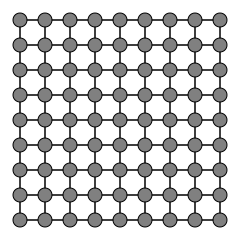

In [1765]:
image = visualize_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

- Cluster the graph by Louvain and return the corresponding modularity.
- Try to shuffle the nodes and observe the results.
- Find a better clustering than Louvain in terms of modularity.


In [1766]:
louvain = Louvain()
labels = louvain.fit_predict(adjacency)

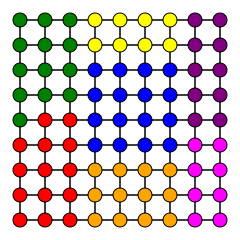

In [1767]:
image = visualize_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

In [1768]:
get_modularity(adjacency, labels)

0.6220341435185185

In [1769]:
n = adjacency.shape[0]
idx = np.arange(n)
np.random.shuffle(idx)

In [1770]:
adjacency_shuffle = adjacency[idx][:, idx]
position_shuffle = position[idx]

In [1771]:
labels_shuffle = louvain.fit_predict(adjacency_shuffle)

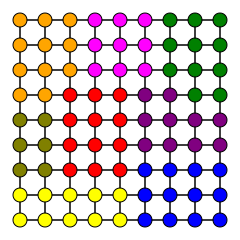

In [1772]:
image = visualize_graph(
    adjacency_shuffle, position_shuffle, labels=labels_shuffle, width=200, height=200
)
SVG(image)

In [1773]:
get_modularity(adjacency_shuffle, labels_shuffle)

0.626904899691358

In [1774]:
n = adjacency.shape[0]
labels = np.array([((i % 9) // 3) * 3 + (i // 9) // 3 for i in range(n)])

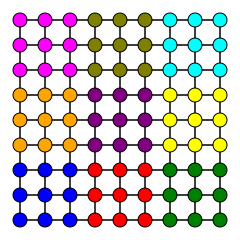

In [1775]:
image = visualize_graph(adjacency, position, labels=labels, width=200, height=200)
SVG(image)

In [1776]:
get_modularity(adjacency, labels)

0.638454861111111

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.


In [1777]:
dataset = karate_club(metadata=True)

In [1778]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

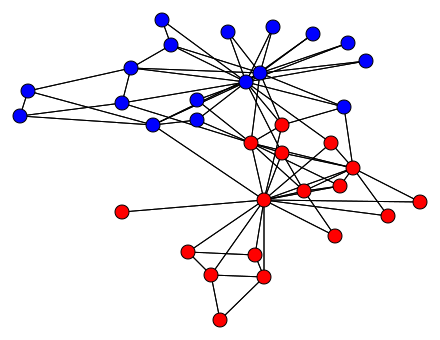

In [1779]:
image = visualize_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

- Cluster the graph by Louvain and display the labels.
- Give the modularity.
- Display the aggregate graph (check this [tutorial](https://scikit-network.readthedocs.io/en/latest/tutorials/clustering/louvain.html)).
- Adapt the resolution to get 2 clusters. Compare with the ground-truth.


In [1780]:
louvain = Louvain()
labels = louvain.fit_predict(adjacency)

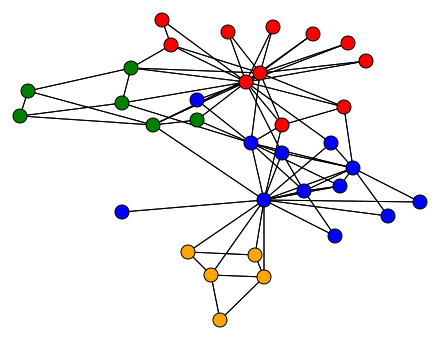

In [1781]:
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

In [1782]:
get_modularity(adjacency, labels)

0.4188034188034188

In [1783]:
adjacency_aggregate = louvain.aggregate_
average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)

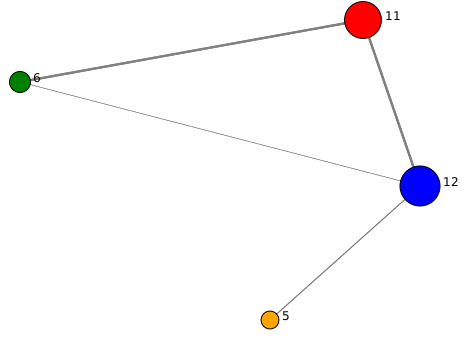

In [1784]:
image = visualize_graph(
    adjacency_aggregate,
    position_aggregate,
    counts,
    labels=labels_unique,
    display_node_weight=True,
    node_weights=counts,
)
SVG(image)

In [1785]:
louvain = Louvain(resolution=0.5)

In [1786]:
labels = louvain.fit_predict(adjacency)

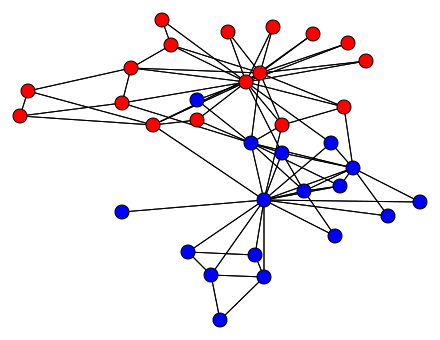

In [1787]:
image = visualize_graph(adjacency, position, labels=labels)
SVG(image)

In [1788]:
labels_pred = labels

if np.sum(labels_pred == labels_true) < np.sum(labels_pred == 1 - labels_true):
    labels_pred = 1 - labels_pred

misclassified = np.argwhere(labels_pred != labels_true).ravel()

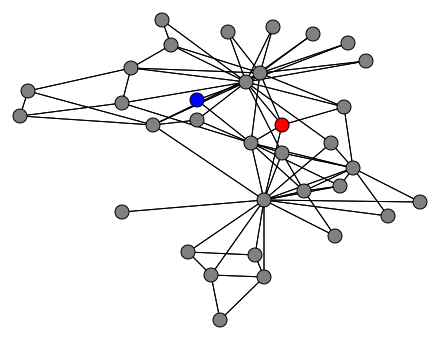

In [1789]:
image = visualize_graph(
    adjacency, position, labels={i: labels[i] for i in misclassified}
)
SVG(image)

## Openflights


In [1790]:
dataset = openflights

In [1791]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

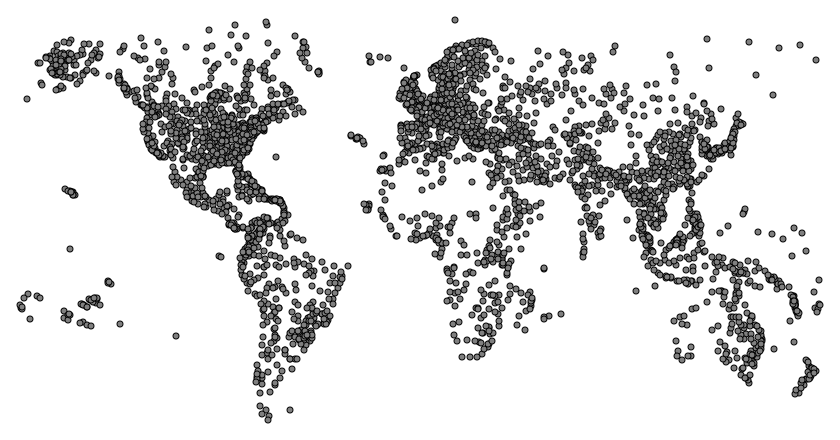

In [1792]:
image = visualize_graph(
    adjacency, position, width=800, height=400, node_size=3, display_edges=False
)
SVG(image)

## To do

- Display the same world map with the clusters found by Louvain (resolution 1).
- How many clusters are there?
- What is the Simpson index of this clustering?
- List the top airport of each cluster in number of flights.
- Display the aggregate graph with the cluster volumes and the name of the top airport of each cluster.
- Display the same graph restricted to clusters with at least 100 nodes.


In [1793]:
louvain = Louvain(resolution=1)
labels = louvain.fit_predict(adjacency)

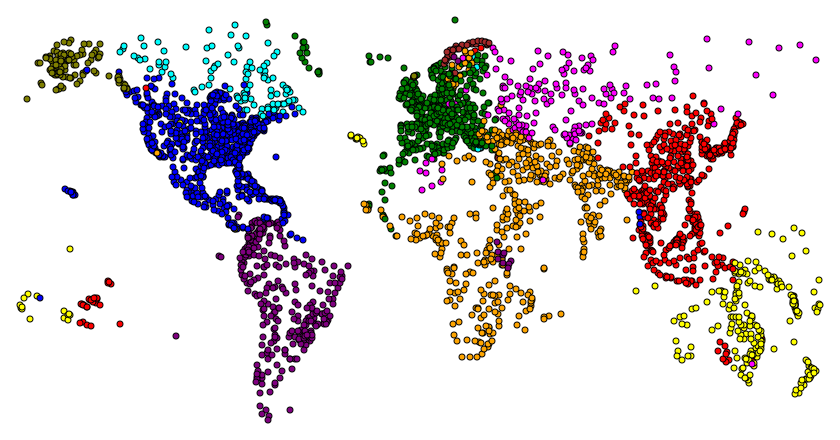

In [1794]:
image = visualize_graph(
    adjacency,
    position,
    width=800,
    height=400,
    node_size=3,
    labels=labels,
    display_edges=False,
)
SVG(image)

In [1795]:
print(f"There are {len(np.unique(labels))} clusters.")

There are 30 clusters.


In [1796]:
simposon = get_modularity(adjacency, labels, return_all=True)[2]

print(f"The Simposon index is {simposon:.4f}")

The Simposon index is 0.2156


In [1797]:
labels_unique, counts = np.unique(labels, return_counts=True)

n = adjacency.shape[0]
weights = adjacency.dot(np.ones(n))

top_airports = []

for label in labels_unique:
    cluster = np.argwhere(labels == label).ravel()
    top_airports.append(cluster[np.argmax(weights[cluster])])

print("Top airport per cluster:")

for i, airport in enumerate(top_airports):
    print(f"Cluster {i+1}: {names[airport]}")

Top airport per cluster:
Cluster 1: Hartsfield Jackson Atlanta International Airport
Cluster 2: Beijing Capital International Airport
Cluster 3: Amsterdam Airport Schiphol
Cluster 4: Atatürk International Airport
Cluster 5: Guarulhos - Governador André Franco Montoro International Airport
Cluster 6: Sydney Kingsford Smith International Airport
Cluster 7: Domodedovo International Airport
Cluster 8: Ted Stevens Anchorage International Airport
Cluster 9: Quebec Jean Lesage International Airport
Cluster 10: Trondheim Airport Værnes
Cluster 11: Sioux Lookout Airport
Cluster 12: Faa'a International Airport
Cluster 13: Godthaab / Nuuk Airport
Cluster 14: Stockholm-Bromma Airport
Cluster 15: Nairobi Wilson Airport
Cluster 16: João Paulo II Airport
Cluster 17: Touat Cheikh Sidi Mohamed Belkebir Airport
Cluster 18: Kirkwall Airport
Cluster 19: Sitia Airport
Cluster 20: Eilat Airport
Cluster 21: Myeik Airport
Cluster 22: Ivalo Airport
Cluster 23: St. Mary's Airport
Cluster 24: Pori Airport
Cluste

In [1798]:
adjacency_aggregate = louvain.aggregate_
average = normalize(get_membership(labels).T)
position_aggregate = average.dot(position)

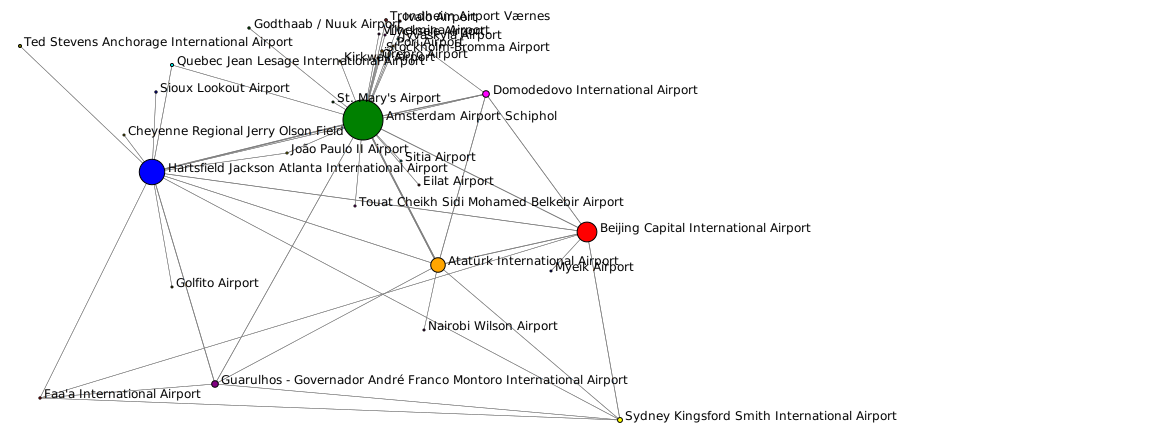

In [1799]:
image = visualize_graph(
    adjacency_aggregate,
    position_aggregate,
    names=names[top_airports],
    labels=labels_unique,
    display_node_weight=True,
    width=600,
    height=400,
)
SVG(image)

In [1800]:
_, counts = np.unique(labels, return_counts=True)
index = np.argwhere(counts >= 100).ravel()

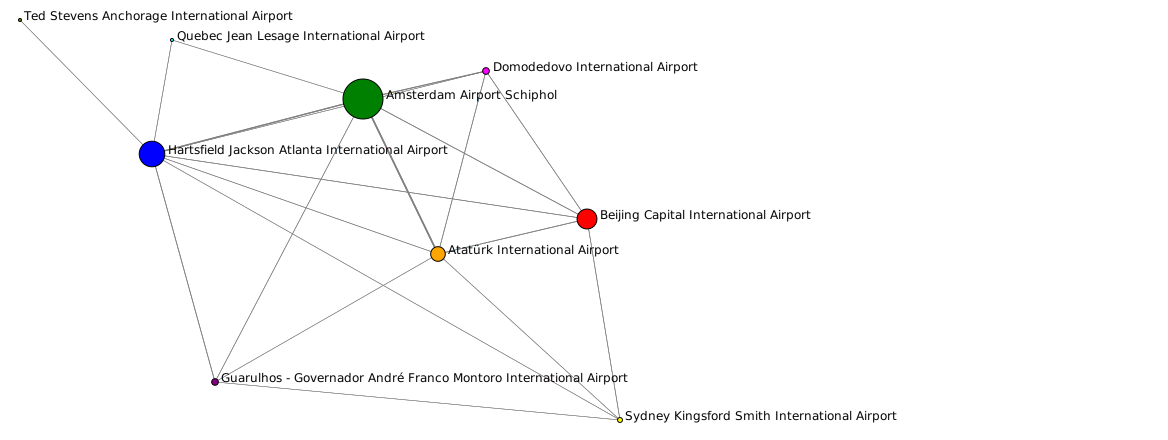

In [1801]:
image = visualize_graph(
    adjacency_aggregate[index][:, index],
    position_aggregate[index],
    names=names[top_airports][index],
    labels=labels_unique[index],
    display_node_weight=True,
    width=600,
    height=400,
)
SVG(image)

## 2. Directed graphs


## Wikipedia Vitals


In [1802]:
graph = wikivitals

In [1803]:
adjacency = graph.adjacency
names = graph.names

## To do

- Cluster the graph by Louvain (resolution 1).
- List the top-5 pages of each cluster in terms of Personalized PageRank.
- Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
- Display the same graph restricted to clusters with at least 100 nodes.
- Repeat the same experiments at resolution 2.


In [1804]:
louvain = Louvain(resolution=1)
labels = louvain.fit_predict(adjacency)

In [1805]:
print(f"There are {len(np.unique(labels))} clusters.")

There are 9 clusters.


In [1806]:
pagerank = PageRank()

top_pages = []

for cluster in np.unique(labels):
    scores = pagerank.fit_predict(adjacency, weights=labels == cluster)
    scores *= labels == cluster
    top_5 = np.argsort(-scores)[:5]
    top_pages.append(top_5[0])  # take the first page of each cluster
    print(names[top_5])

['Physics' 'Hydrogen' 'Oxygen' 'Kelvin' 'Albert Einstein']
['Taxonomy (biology)' 'Animal' 'Plant' 'Protein' 'Species']
['Latin' 'World War I' 'Roman Empire' 'Middle Ages' 'Greek language']
['Christianity' 'Aristotle' 'Catholic Church' 'Plato'
 'Age of Enlightenment']
['United States' 'World War II' 'Geographic coordinate system'
 'United Kingdom' 'France']
['China' 'India' 'Buddhism' 'Islam' 'Chinese language']
['The New York Times' 'New York City' 'Time (magazine)' 'BBC'
 'The Washington Post']
['Earth' 'Atlantic Ocean' 'Europe' 'Drainage basin' 'Pacific Ocean']
['Handbag' 'Hat' 'Veil' 'Uniform' 'Clothing']


In [1807]:
print(f"The top pages are {names[top_pages]}.")

The top pages are ['Physics' 'Taxonomy (biology)' 'Latin' 'Christianity' 'United States'
 'China' 'The New York Times' 'Earth' 'Handbag'].


In [1808]:
adjacency_aggregate = louvain.aggregate_

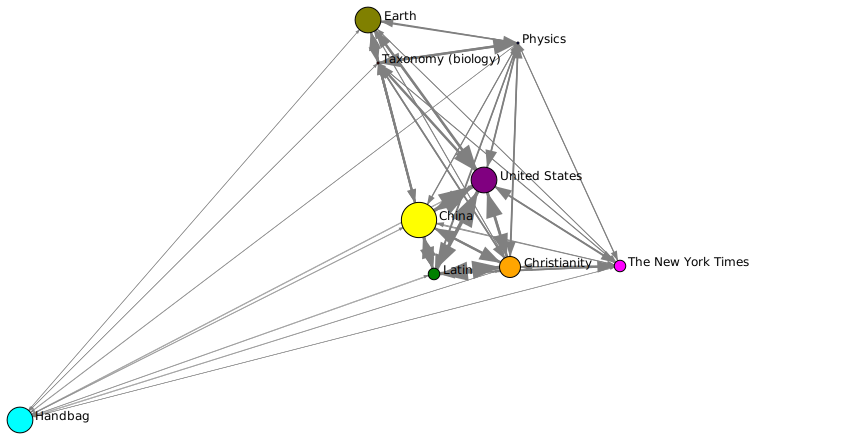

In [1809]:
image = visualize_graph(
    adjacency_aggregate,
    names=names[top_pages],
    width=600,
    height=400,
    display_node_weight=True,
    display_edge_weight=True,
    node_weights=labels,
    labels=np.unique(labels),
)
SVG(image)

In [1810]:
_, counts = np.unique(labels, return_counts=True)

In [1811]:
index = np.argwhere(counts >= 100).ravel()

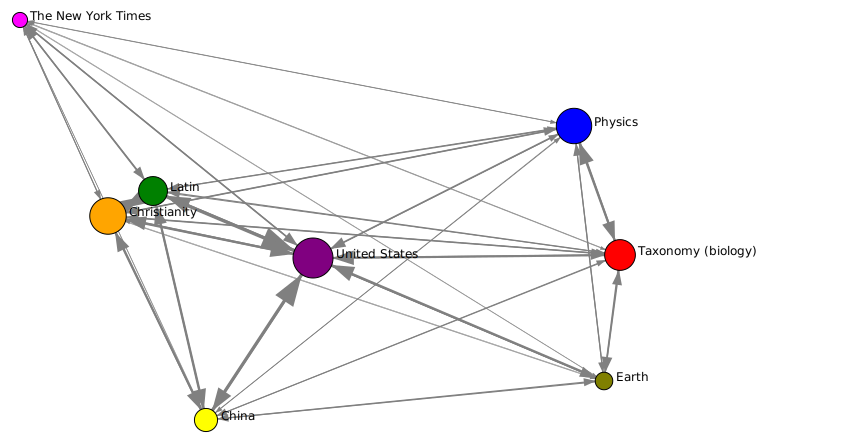

In [1812]:
image = visualize_graph(
    adjacency_aggregate[index][:, index],
    names=names[top_pages][index],
    width=600,
    height=400,
    display_node_weight=True,
    display_edge_weight=True,
    edge_width_max=20,
    labels=np.unique(labels)[index],
)
SVG(image)

In [1813]:
louvain = Louvain(resolution=2)
labels = louvain.fit_predict(adjacency)

In [1814]:
print(f"There are {len(np.unique(labels))} clusters.")

There are 25 clusters.


In [1815]:
pagerank = PageRank()

top_pages = []

for cluster in np.unique(labels):
    scores = pagerank.fit_predict(adjacency, weights=labels == cluster)
    scores *= labels == cluster
    top_5 = np.argsort(-scores)[:5]
    top_pages.append(top_5[0])  # take the first page of each cluster
    print(names[top_5])

['Taxonomy (biology)' 'Animal' 'Chordate' 'Permian' 'Cambrian']
['The New York Times' 'BBC' 'Time (magazine)' 'The Washington Post'
 'Library of Congress']
['Physics' 'Albert Einstein' 'Isaac Newton' 'Kelvin' 'Electron']
['World Health Organization' 'Medical diagnosis' 'Cancer'
 'Central nervous system' 'Immune system']
['Jewellery' 'Wood' 'Industrial Revolution' 'Axe' 'Agriculture']
['Real number' 'Function (mathematics)' 'Complex number'
 'Set (mathematics)' 'Mathematical analysis']
['Aristotle' 'Plato' 'Immanuel Kant' 'David Hume' 'Age of Enlightenment']
['Christianity' 'Catholic Church' 'Buddhism' 'Islam' 'Hinduism']
['Ottoman Empire' 'Roman Empire' 'Byzantine Empire' 'Iran'
 'Persian language']
['Paris' 'London' 'Modernism' 'Renaissance' 'Rome']
['World War II' 'World War I' 'Soviet Union' 'Cold War' 'United Nations']
['China' 'Chinese language' 'Japan' 'Ming dynasty' 'Qing dynasty']
['United Kingdom' 'France' 'Egypt' 'South Africa' 'Canada']
['Earth' 'NASA' 'Plate tectonics' 'Moo

In [1816]:
print(f"The top pages are {names[top_pages]}.")

The top pages are ['Taxonomy (biology)' 'The New York Times' 'Physics'
 'World Health Organization' 'Jewellery' 'Real number' 'Aristotle'
 'Christianity' 'Ottoman Empire' 'Paris' 'World War II' 'China'
 'United Kingdom' 'Earth' 'Oxygen' 'Flowering plant'
 'Geographic coordinate system' 'Germany' 'Latin' 'United States' 'India'
 'Spain' 'Olympic Games' 'Common law' 'William the Conqueror'].


In [1817]:
adjacency_aggregate = louvain.aggregate_

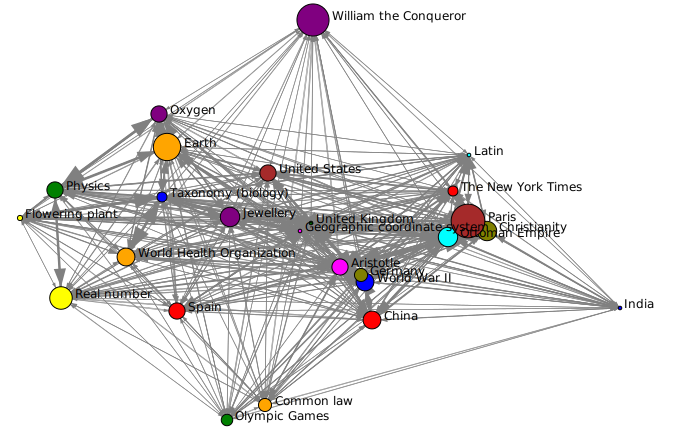

In [1818]:
image = visualize_graph(
    adjacency_aggregate,
    names=names[top_pages],
    width=600,
    height=400,
    display_node_weight=True,
    display_edge_weight=True,
    node_weights=labels,
    labels=np.unique(labels),
)
SVG(image)

In [1819]:
_, counts = np.unique(labels, return_counts=True)

In [1820]:
index = np.argwhere(counts >= 100).ravel()

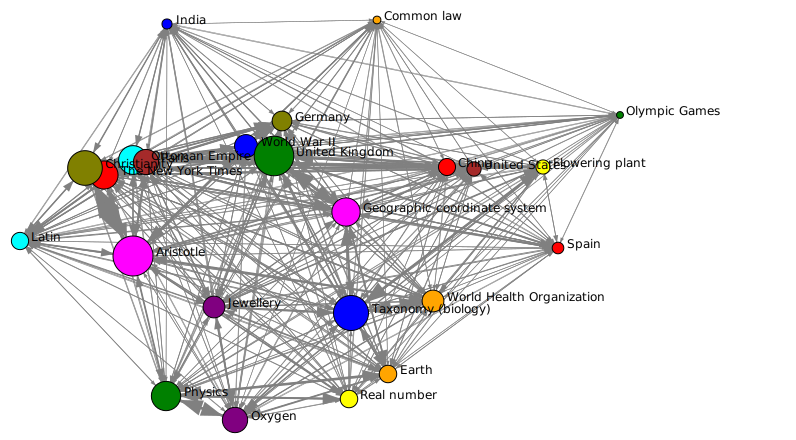

In [1821]:
image = visualize_graph(
    adjacency_aggregate[index][:, index],
    names=names[top_pages][index],
    width=600,
    height=400,
    display_node_weight=True,
    display_edge_weight=True,
    edge_width_max=20,
    labels=np.unique(labels)[index],
)
SVG(image)

## 3. Bipartite graphs


## Cinema


In [1822]:
dataset = cinema

In [1823]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

## To do


- Cluster the graph by Louvain (resolution 1).
- List the 10 largest clusters and display the names of the top-5 actors and top-5 movies of these cluster in terms of Personalized PageRank.


In [1824]:
louvain = Louvain()
louvain.fit(biadjacency)

Louvain(resolution=1, modularity='dugue', tol_optimization=0.001, tol_aggregation=0.001, n_aggregations=-1, shuffle_nodes=False, sort_clusters=True, return_probs=True, return_aggregate=True)

In [1825]:
labels_row = louvain.labels_row_
labels_col = louvain.labels_col_

pagerank = PageRank()

for label in np.unique(labels_row)[:10]:
    pagerank.fit(
        biadjacency, weights_row=labels_row == label, weights_col=labels_col == label
    )
    scores_row = pagerank.scores_row_ * (labels_row == label)
    scores_col = pagerank.scores_col_ * (labels_col == label)

    print(movies[np.argsort(-scores_row)[:5]])
    print(actors[np.argsort(-scores_col)[:5]])
    print(np.sum(labels_row == label), np.sum(labels_col == label))
    print()

['The Walking Dead (TV series)' 'Arrow (TV series)'
 'House of Cards (U.S. TV series)' 'Vikings (TV series)' 'Twin Peaks']
['Eric Roberts' 'Donald Sutherland' 'Harvey Keitel' 'Danny Trejo'
 'Robert De Niro']
17018 10884

['Paramount on Parade' 'Ziegfeld Follies' 'Mourning Becomes Electra'
 'The Crusades' 'Night Life in Hollywood']
['Harry Carey' 'Blanche Sweet' 'Roy Rogers' 'Mary Pickford'
 'Lionel Barrymore']
14442 4488

['Suyamvaram' 'Kerala Cafe' 'Paalayam' "Karinkunnam 6'S" 'Lokanathan IAS']
['Prem Nazir' 'Jagathy Sreekumar' 'Adoor Bhasi' 'Mammootty' 'Mohanlal']
11186 2262

['Kaamelott' 'Research unit' 'Hero Corp' 'Un village français'
 'Scènes de ménages']
['Louis de Funès' 'Isabelle Huppert' 'Marcello Mastroianni' 'Totò'
 'Gérard Depardieu']
8214 3892

['The Devil Rides Out' "What's Up Superdoc!" 'Unforgotten' 'Thunderbird 6'
 'The Vampire Lovers']
['Christopher Lee' 'Stewart Rome' 'John Stuart' 'James Mason'
 'Peter Cushing']
7685 4136

['Seven Samurai' 'Toei Hero Next' 'Metropo